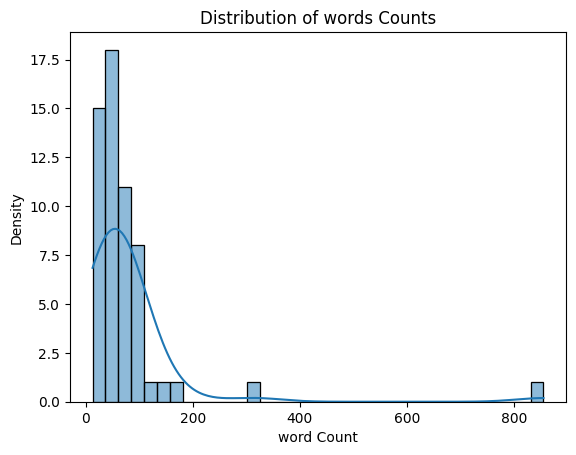

Mean Token Counts: 77.26 word per section
Total number of tokens: 309.05263157894734
std of Token Counts: 113.85 tokens^2 per section


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from PyPDF2 import PdfReader
import math

def split_and_count_tokens(pdf_path, split_word):
    """Function to split the text in a PDF by a given word and count tokens in each part."""
    def count_tokens(text):
        """Count the number of tokens in a given text."""
        return len(text.split())

    def split_text_recursive(text, split_word):
        """Recursively split the text on a split_word, returning a flat list of sections."""
        parts = []
        if split_word in text:
            splitted_text = text.split(split_word)
            for subtext in splitted_text:
                parts.extend(split_text_recursive(subtext, split_word))
        else:
            parts.append(text)
        return parts

    with open(pdf_path, 'rb') as file:
        pdf = PdfReader(file)
        num_pages = len(pdf.pages)  # Use the len() function to get the number of pages
        text = ''
        for page_num in range(num_pages):
            page = pdf.pages[page_num]  # Correct reference to the page object
            extracted_text = page.extract_text()
            if extracted_text:  # Check if text was extracted
                text += extracted_text

    splitted_texts = split_text_recursive(text, split_word)
    token_counts = [count_tokens(subtext) for subtext in splitted_texts if subtext.strip()]

    sns.histplot(token_counts, kde=True)  # Using histplot with kernel density estimation
    plt.xlabel('word Count')
    plt.ylabel('Density')
    plt.title('Distribution of words Counts')
    plt.show()

    return token_counts

# Usage example
pdf_path = 'CELEX_12016P_TXT_EN_TXT.pdf'
split_word = 'Article'
token_counts = split_and_count_tokens(pdf_path, split_word)
mean_token_counts = sum(token_counts) / len(token_counts)
var_token_counts = sum((x - mean_token_counts) ** 2 for x in token_counts) / len(token_counts)
print(f"Mean Token Counts: {mean_token_counts:.2f} word per section")
numb_of_words = mean_token_counts*4
print(f"Total number of tokens: {numb_of_words}")
std = math.sqrt(var_token_counts)
print(f"std of Token Counts: {std:.2f} tokens^2 per section")
